In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stacks = 50000
players = 1
num_decks = 1
card_types = ['A',2,3,4,5,6,7,8,9,10,'J','Q','K']
suits = ['C','D','H','S']

In [36]:
k = [1,2]
new_deck = np.array(k)
new_deck

array([1, 2])

In [5]:
def make_decks(num_decks,shuffle=None):
    card_types = ['A',2,3,4,5,6,7,8,9,10,'J','Q','K']
    suits = ['C','D','H','S']
    new_deck = []
    idx = 0
    for i in range(num_decks):
        for j in suits:
            for k in card_types:
                new_deck.append([idx,j,k])
                idx = idx + 1
                
    if shuffle == 1:
        random.shuffle(new_deck)
    return new_deck

In [71]:

deck = make_decks(1,shuffle=1)
    #draw a hand
deck, hand = draw_card(deck,2)
    #draw flops
deck, flop = draw_card(deck,3)
    
for i in get_values(flop)[0]:
    print(i=='A')
    print(i)


False
6
True
A
False
Q


In [92]:
4 in [2,2]

False

In [123]:
#determine simulate hand and five community cards, return yes if a quads happen 
def quads():
    pocket_pair = 0
    quads_by_flop = 0
    quads_by_turn = 0
    quads_by_river = 0
    quad_count = [0,0]
    
    #make a deck
    deck = make_decks(1,shuffle=0)
    #draw a hand
    deck, hand = draw_card(deck,2)
    if get_values(hand)[0][0] == get_values(hand)[0][1]:
        pocket_pair = 1
        quad_count = [2,2]
        pair = get_values(hand)[0][0]
    else:
        quad_count = [1,1]
    #draw flops
    deck, flop = draw_card(deck,3)
    for i in get_values(flop)[0]:
        if i == get_values(hand)[0][0]:
            quad_count[0] += 1
        if i == get_values(hand)[0][1]:
            quad_count[1] += 1
        if 4 in quad_count:
            quads_by_flop = 1 
            return pocket_pair, quads_by_flop, quads_by_turn, quads_by_river, True
        else:
            continue
    #draw turn
    deck, turn = draw_card(deck,1)
    if get_values(turn)[0][0] == get_values(hand)[0][0]:
        quad_count[0] += 1
    if get_values(turn)[0][0] == get_values(hand)[0][1]:
        quad_count[1] += 1
    if 4 in quad_count:
        quads_by_turn = 1 
        return pocket_pair, quads_by_flop, quads_by_turn, quads_by_river, True

    #draw river
    deck, river = draw_card(deck,1)
    if get_values(river)[0][0] == get_values(hand)[0][0]:
        quad_count[0] += 1
    if get_values(river)[0][0] == get_values(hand)[0][1]:
        quad_count[1] += 1
    if 4 in quad_count:
        quads_by_river = 1 
        return pocket_pair, quads_by_flop, quads_by_turn, quads_by_river, True
    else:
        return pocket_pair, quads_by_flop, quads_by_turn, quads_by_river, False
    


In [152]:
record = []
for i in range(200000):
    record.append(quads())
print("pocket pair:",np.mean(np.array(record)[:,0]))
print("quads_by_flop:",np.mean(np.array(record)[:,1]))
print("quads_by_turn:",np.mean(np.array(record)[:,2]))
print("quads_by_river:",np.mean(np.array(record)[:,3]))
print("overall:",np.mean(np.array(record)[:,4]))

pocket pair: 0.058675
quads_by_flop: 0.00025
quads_by_turn: 0.000505
quads_by_river: 0.00074
overall: 0.001495


In [153]:
mask = np.array(record)[:,0]==1
mask1 = np.array(record)[:,0]==0
print("quad given pair:",np.mean(np.array(record)[mask][:,4]))
print("number of pair:",np.count_nonzero(np.array(record)[:,0]==1))
print("number of quad given pair:",np.count_nonzero(np.array(record)[mask][:,4]==1))
print("quad given no pair:",np.mean(np.array(record)[mask1][:,4]))

quad given pair: 0.007328504473796336
number of pair: 11735
number of quad given pair: 86
quad given no pair: 0.0011313839534698431


In [10]:
#draw a card from deck
def draw_card(deck,n):
    cards = []
    for i in range(n):
        #print('len(deck):',len(deck))
        cards_idx = list(np.array(deck)[:,0])
        #print('cards_idx:',cards_idx)
        random_card_idx = int(random.choice(cards_idx))
        #print('random_card_idx:',random_card_idx)
        random_card = deck[cards_idx.index(str(random_card_idx))]
        deck.remove(random_card)
        cards.append(random_card)
    return deck, cards

a_deck = make_decks(1)
print(draw_card(a_deck,3)[1])
#print(len(a_deck))

[[48, 'S', 10], [10, 'C', 'J'], [35, 'H', 10]]


In [11]:
def get_values(cards):
    cards_values_arr = np.array(cards)[:,2]
    total_value = 0
    ace = 0
    for i in cards_values_arr:
        if i in ['J','Q','K']:
            total_value += 10
        elif i in ['2','3','4','5','6','7','8','9','10']:
            total_value += int(i)
        else:
            ace += 1
            
    for i in range(ace):
        if (total_value + 11) > 21:
            total_value += 1
        else:
            total_value +=11

    return cards_values_arr, total_value

a_deck = make_decks(1)
get_values([['3','D','5'],['4','D','A']])

(array(['5', 'A'], dtype='<U1'), 16)

In [12]:
def dealers_turn(deck, dealers_card):
    
    while get_values(dealers_card)[1] < 17:
        deck, dealers_additional_card = draw_card(deck,1)
        dealers_card.append(dealers_additional_card[0])
    
    return deck, dealers_card

def players_turn(deck, players_card):
    
    deck, players_additional_card = draw_card(deck,1)
    players_card.append(players_additional_card[0])
    
    return deck, players_card

In [308]:
deck = make_decks(1)
deck, dealers_card = draw_card(deck,1)
dealers_card

[[26, 'H', 'A']]

In [529]:
#starting round
deck = make_decks(1)
deck, dealers_card = draw_card(deck,1)
deck, players_card = draw_card(deck,2)
print("dealers_card: ", get_values(dealers_card)[0], "total_value: ",get_values(dealers_card)[1])
print("dealers_card: ", get_values(players_card)[0], "total_value: ",get_values(players_card)[1])

dealers_card:  ['3'] total_value:  3
dealers_card:  ['A' '6'] total_value:  17


In [530]:
deck, a = players_turn(deck, players_card)
print(a)
print(get_values(a)[1])

[[39, 'S', 'A'], [18, 'D', 6], [23, 'D', 'J']]
17


In [557]:
#simulating blackjack
import random
win = 0
lose = 0
draw = 0
randomness = 0

for i in range(1000):
    
    
    #starting round
    deck = make_decks(1)
    deck, dealers_card = draw_card(deck,1)
    deck, players_card = draw_card(deck,2)
    #print("dealers_card: ", get_values(dealers_card)[0], "total_value: ",get_values(dealers_card)[1])
    #print("players_card: ", get_values(players_card)[0], "total_value: ",get_values(players_card)[1])
    
    if randomness == 0:
    #always hit until 17 or higher
        while get_values(players_card)[1] < 17:
            deck, players_card = players_turn(deck, players_card)
    
    elif randomness == 1:
        #hit once at random
        if random.random() >= 0.5:
            deck, players_card = players_turn(deck, players_card)
    
    elif randomness == 2:
        #hit until hand at least 12
        while get_values(players_card)[1] < 12:
            deck, players_card = players_turn(deck, players_card)
            
    player = get_values(players_card)[1]
    #print("players_total: ",player)
    #dealers turn
    deck, a = dealers_turn(deck, dealers_card)
    dealer = get_values(dealers_card)[1]
    #print("dealers_total: ",dealer)
    
    if player > 21:
        lose += 1
    elif dealer > 21:
        win += 1
    elif player < dealer:
        lose += 1
    elif player > dealer:
        win += 1
    elif player == dealer:
        draw += 1
    
print("win percentage: ", win/(win+lose+draw))
print("lose percentage: ", lose/(win+lose+draw))
print("draw percentage: ", draw/(win+lose+draw))

win percentage:  0.4131
lose percentage:  0.4887
draw percentage:  0.0982


In [598]:
#get the effect of house advantage given some cards and current house advantage
def get_house_advantage(current_advantage, cards):
    cards_values_arr = np.array(cards)[:,2]
    #print(cards_values_arr)
    for i in cards_values_arr:
        #print(i)
        if i in ['2','3','4','5','6']:
            current_advantage += 1
        elif i in ['10','J','Q','K','A']:
            current_advantage -= 1
        else:
            current_advantage += 0
            
    return current_advantage

current_advantage = 0
deck = make_decks(1)
deck, dealers_card = draw_card(deck,2)
get_house_advantage(current_advantage, dealers_card)

-1

In [576]:
def dealers_turn_(current_advantage, deck, dealers_card):
    
    while get_values(dealers_card)[1] < 17:
        deck, dealers_additional_card = draw_card(deck,1)
        current_advantage = get_house_advantage(current_advantage, dealers_additional_card)
        dealers_card.append(dealers_additional_card[0])
    
    return deck, dealers_card, current_advantage

def players_turn_(current_advantage, deck, players_card):
    
    deck, players_additional_card = draw_card(deck,1)
    players_card.append(players_additional_card[0])
    current_advantage = get_house_advantage(current_advantage, dealers_additional_card)
    return deck, players_card, current_advantage

In [611]:
#simulating blackjack with counting
import random
win = 0
lose = 0
draw = 0
randomness = 0
deck = make_decks(1)

game = 0
house_advantage = 0
results = []
while len(deck) > 10:
    
    game += 1
    #starting round
    
    deck, dealers_card = draw_card(deck,1)
    
    house_advantage = get_house_advantage(house_advantage,dealers_card)
    
    deck, players_card = draw_card(deck,2)
    
    house_advantage = get_house_advantage(house_advantage,players_card)
    
    #print("current house advantage:",house_advantage)
    #print("dealers_card: ", get_values(dealers_card)[0], "total_value: ",get_values(dealers_card)[1])
    #print("players_card: ", get_values(players_card)[0], "total_value: ",get_values(players_card)[1])
    
    if randomness == 0:
    #always hit until 17 or higher
        while get_values(players_card)[1] < 17:
            deck, players_card, house_advantage = players_turn_(house_advantage, deck, players_card)
    
    elif randomness == 1:
        #hit once at random
        if random.random() >= 0.5:
            deck, players_card, house_advantage = players_turn_(house_advantage, deck, players_card)
    
    elif randomness == 2:
        #hit until hand at least 12
        while get_values(players_card)[1] < 12:
            deck, players_card, house_advantage = players_turn_(house_advantage, deck, players_card)
    
        
    player = get_values(players_card)[1]
    #print("players_total: ",player)
    #dealers turn
    deck, a, house_advantage = dealers_turn_(house_advantage,deck, dealers_card)
    dealer = get_values(dealers_card)[1]
    #print("dealers_total: ",dealer)
    
    if player > 21:
        lose += 1
        results.append('lose')
    elif dealer > 21:
        win += 1
        results.append('win')
    elif player < dealer:
        lose += 1
        results.append('lose')
    elif player > dealer:
        win += 1
        results.append('win')
    elif player == dealer:
        draw += 1
        results.append('draw')
        
    print("current house advantage:",house_advantage)
    
print(game, "games played")
print("results:", results)
print("win percentage: ", win/(win+lose+draw))
print("lose percentage: ", lose/(win+lose+draw))
print("draw percentage: ", draw/(win+lose+draw))

current house advantage: -1
current house advantage: -1
current house advantage: 1
current house advantage: 2
current house advantage: 3
current house advantage: 5
current house advantage: 8
current house advantage: 9
8 games played
results: ['win', 'win', 'win', 'lose', 'lose', 'draw', 'lose', 'win']
win percentage:  0.5
lose percentage:  0.375
draw percentage:  0.125


In [858]:
#collect data of house advantage and results to see if there's any correlation
scores = []
results = []
for i in range(1000):
    deck = make_decks(1)
    game = 0
    house_advantage = 0
    while len(deck) > 10:
        game += 1
        #starting round
    
        deck, dealers_card = draw_card(deck,1)
    
        house_advantage = get_house_advantage(house_advantage,dealers_card)
    
        deck, players_card = draw_card(deck,2)
    
        house_advantage = get_house_advantage(house_advantage,players_card)
    
    #print("current house advantage:",house_advantage)
    #print("dealers_card: ", get_values(dealers_card)[0], "total_value: ",get_values(dealers_card)[1])
    #print("players_card: ", get_values(players_card)[0], "total_value: ",get_values(players_card)[1])
    
        if randomness == 0:
    #always hit until 17 or higher
            while get_values(players_card)[1] < 17:
                deck, players_card, house_advantage = players_turn_(house_advantage, deck, players_card)
    
        elif randomness == 1:
            #hit once at random
            if random.random() >= 0.5:
                deck, players_card, house_advantage = players_turn_(house_advantage, deck, players_card)
    
        elif randomness == 2:
            #hit until hand at least 12
            while get_values(players_card)[1] < 12:
                deck, players_card, house_advantage = players_turn_(house_advantage, deck, players_card)
            
        player = get_values(players_card)[1]
    #print("players_total: ",player)
    #dealers turn
        deck, a, house_advantage = dealers_turn_(house_advantage,deck, dealers_card)
        dealer = get_values(dealers_card)[1]
    #print("dealers_total: ",dealer)
    
        if player > 21:
            lose += 1
            results.append(-1)
        elif dealer > 21:
            win += 1
            results.append(1)
        elif player < dealer:
            lose += 1
            results.append(-1)
        elif player > dealer:
            win += 1
            results.append(1)
        elif player == dealer:
            draw += 1
            results.append(0)
        scores.append(house_advantage)



In [685]:
print(scores[:10])
print(results[:10])
print(len(results))
print(len(scores))

[0, 1, 1, 2, 2, 1, 4, 5, 0, 0]
[-1, -1, 1, 1, 1, 1, 1, -1, 1, -1]
7676
7676


In [859]:

data = [list(a) for a in zip(scores, results)]


In [860]:
df = pd.DataFrame(np.array(data),columns=['Scores','Results'],dtype=np.int8)
df1 = df[df['Results']==1]
df2 = df[df['Results']==-1]
df3 = df[df['Results']==0]
print(df1['Scores'].mean(),df2['Scores'].mean(),df3['Scores'].mean())

3.189137985475213 4.122465531224655 3.3745364647713227


In [732]:
#you win more than lose when the score falls below 0
df4 = df[df['Scores']==3]
df4.describe()

,Scores,Results
count,746.0,746.000000
mean,3.0,-0.083110
std,0.0,0.938975
min,3.0,-1.000000
25%,3.0,-1.000000
50%,3.0,0.000000
75%,3.0,1.000000
max,3.0,1.000000


In [714]:
df.describe()

,Scores,Results
count,7676.000000,7676.000000
mean,3.928478,-0.094581
std,3.993541,0.940811
min,-9.000000,-1.000000
25%,1.000000,-1.000000
50%,4.000000,0.000000
75%,7.000000,1.000000
max,19.000000,1.000000


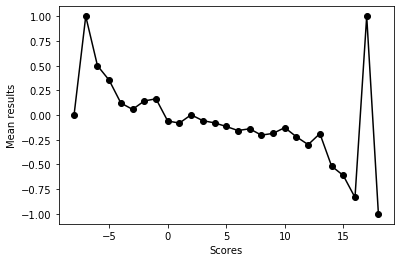

In [861]:
%matplotlib inline
import matplotlib.pyplot as plt

x = []
y = []

for i in range(-9,20):
    x.append(i)
    y.append(df[df['Scores']==i]['Results'].mean())

plt.plot(x,y,'-ok')
plt.xlabel('Scores') 
plt.ylabel('Mean results');

(array([  28.,  391.,  727., 1952., 1474., 1766.,  960.,  255.,  113.,
           9.]),
 array([-8. , -5.4, -2.8, -0.2,  2.4,  5. ,  7.6, 10.2, 12.8, 15.4, 18. ]),
 <a list of 10 Patch objects>)

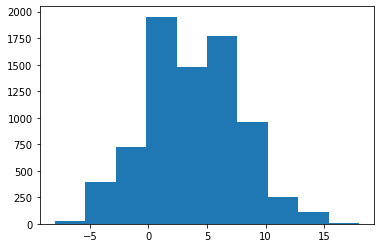

In [862]:
plt.hist(df['Scores'])


In [856]:
#trying to use counting to win the game
scores = []
results = []
predict = []
money = 100
change_money = []
profit_per_round = []
for i in range(1000):
    deck = make_decks(1)
    game = 0
    house_advantage = 0
    money_start = money
    while len(deck) > 10:
        game += 1
        #starting round
        b = 0
        deck, dealers_card = draw_card(deck,1)
    
        house_advantage = get_house_advantage(house_advantage,dealers_card)
    
        deck, players_card = draw_card(deck,2)
    
        house_advantage = get_house_advantage(house_advantage,players_card)
        
        if house_advantage < 0:
            predict.append(1)
            b = 1
            bet = 10
        else:
            predict.append(-1)
            
    #print("current house advantage:",house_advantage)
    #print("dealers_card: ", get_values(dealers_card)[0], "total_value: ",get_values(dealers_card)[1])
    #print("players_card: ", get_values(players_card)[0], "total_value: ",get_values(players_card)[1])
    
        if randomness == 0:
    #always hit until 17 or higher
            while get_values(players_card)[1] < 17:
                deck, players_card, house_advantage = players_turn_(house_advantage, deck, players_card)
    
        elif randomness == 1:
            #hit once at random
            if random.random() >= 0.5:
                deck, players_card, house_advantage = players_turn_(house_advantage, deck, players_card)
    
        elif randomness == 2:
            #hit until hand at least 12
            while get_values(players_card)[1] < 12:
                deck, players_card, house_advantage = players_turn_(house_advantage, deck, players_card)
        
            
        player = get_values(players_card)[1]
    #print("players_total: ",player)
    #dealers turn
        deck, a, house_advantage = dealers_turn_(house_advantage,deck, dealers_card)
        dealer = get_values(dealers_card)[1]
    #print("dealers_total: ",dealer)
    
        if player > 21:
            lose += 1
            results.append(-1)
            #results of bet if any
            if b == 1:
                money = money - bet*2

        elif dealer > 21:
            win += 1
            results.append(1)
            if b == 1:
                money = money + bet*2

        elif player < dealer:
            lose += 1
            results.append(-1)
            if b == 1:
                money = money - bet*2

        elif player > dealer:
            win += 1
            results.append(1)
            if b == 1:
                money = money + bet*2

        elif player == dealer:
            draw += 1
            results.append(0)
            
        scores.append(house_advantage)
        change_money.append(money)
    money_stop = money
    profit_per_round.append(money_stop-money_start)

profit per round: 0.5


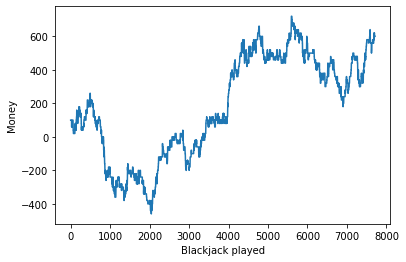

In [857]:
plt.plot(change_money)
print("profit per round:",np.mean(np.array(profit_per_round)))
plt.xlabel('Blackjack played') 
plt.ylabel('Money');

In [781]:
#our probability of guessing the right outcome given house advantage with counting 
#this is excluding all the draws
predict = np.array(predict)
results = np.array(results)

guess = predict[results!=0]==results[results!=0]
np.mean(guess)


0.5488840892728581

In [66]:
# This function lists out all permutations of ace values in the
# array sum_array.
# For example, if you have 2 aces, there are 4 permutations:
#     [[1,1], [1,11], [11,1], [11,11]]
# These permutations lead to 3 unique sums: [2, 12, 22]
# Of these 3, only 2 are <=21 so they are returned: [2, 12]
def get_ace_values(temp_list):
    sum_array = np.zeros((2**len(temp_list), len(temp_list)))
    # This loop gets the permutations
    for i in range(len(temp_list)):
        n = len(temp_list) - i
        half_len = int(2**n * 0.5)
        for rep in range(int(sum_array.shape[0]/half_len/2)):
            sum_array[rep*2**n : rep*2**n+half_len, i]=1
            sum_array[rep*2**n+half_len : rep*2**n+half_len*2, i]=11
    # Only return values that are valid (<=21)
    return list(set([int(s) for s in np.sum(sum_array, axis=1)\
                     if s<=21]))
# Convert num_aces, an int to a list of lists
# For example if num_aces=2, the output should be [[1,11],[1,11]]
# I require this format for the get_ace_values function
def ace_values(num_aces):
    temp_list = []
    for i in range(num_aces):
        temp_list.append([1,11])
    return get_ace_values(temp_list)


In [11]:
# Total up value of hand
def total_up(hand):
    aces = 0
    total = 0
    
    for card in hand:
        if card != 'A':
            total += card
        else:
            aces += 1
    
    # Call function ace_values to produce list of possible values
    # for aces in hand
    ace_value_list = ace_values(aces)
    final_totals = [i+total for i in ace_value_list if i+total<=21]
    
    if final_totals == []:
        return min(ace_value_list) + total
    else:
        return max(final_totals)

In [13]:
for stack in range(stacks):
    blackjack = set(['A',10])
    dealer_cards = make_decks(num_decks, card_types)
    while len(dealer_cards) > 20:
        
        curr_player_results = np.zeros((1,players))
        
        dealer_hand = []
        player_hands = [[] for player in range(players)]
        # Deal FIRST card
        for player, hand in enumerate(player_hands):
            player_hands[player].append(dealer_cards.pop(0))
        dealer_hand.append(dealer_cards.pop(0))
        # Deal SECOND card
        for player, hand in enumerate(player_hands):
            player_hands[player].append(dealer_cards.pop(0))
        dealer_hand.append(dealer_cards.pop(0))

In [14]:
# Dealer checks for 21
if set(dealer_hand) == blackjack:
    for player in range(players):
        if set(player_hands[player]) != blackjack:
            curr_player_results[0,player] = -1
        else:
            curr_player_results[0,player] = 0
else:
    for player in range(players):
                # Players check for 21
        if set(player_hands[player]) == blackjack:
                    curr_player_results[0,player] = 1
        else:
                    # Hit randomly, check for busts
            while (random.random() >= 0.5) and \
                    (total_up(player_hands[player]) <= 11):
                        player_hands[player].append]
                        (dealer_cards.pop(0))
                if total_up(player_hands[player]) > 21:
                    curr_player_results[0,player] = -1
                    break

SyntaxError: invalid syntax (<ipython-input-15-b16e70b58807>, line 1)